In [154]:
import pandas as  pd
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

### Visualize data (each image size (113, 137, 113))

Text(0.5, 1.0, 'Gray matter (Traverse)')

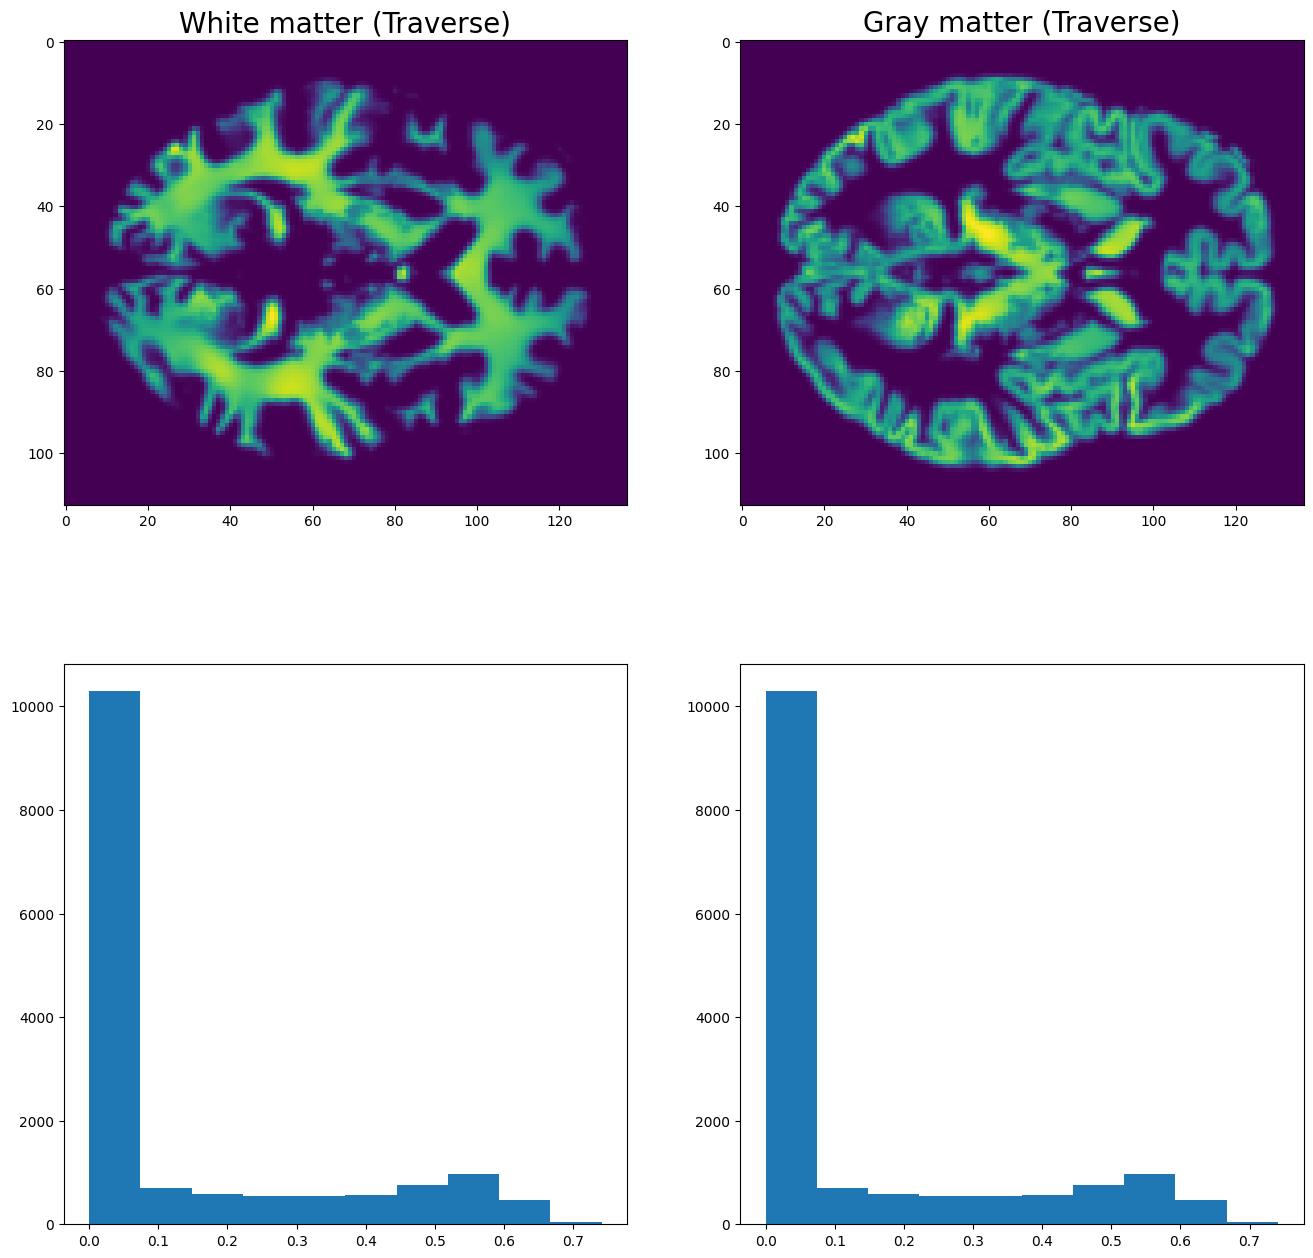

In [161]:
slice = 50
demo_filepath_whitematter = '/Users/jayantadey/data_MRI/sub-A00008326/mri/mwp2sub-A00008326_T1w.nii'
demo_filepath_graymatter = '/Users/jayantadey/data_MRI/sub-A00008326/mri/mwp1sub-A00008326_T1w.nii'

img_whitematter = nb.load(demo_filepath_whitematter).get_fdata()
sliced_img_whitematter = img_whitematter[:,:,slice]

img_graymatter = nb.load(demo_filepath_graymatter).get_fdata()
sliced_img_graymatter = img_graymatter[:,:,slice]

fig, ax = plt.subplots(2,2, figsize=(16,16))
ax[0][0].imshow(sliced_img_whitematter)
ax[0][1].imshow(sliced_img_graymatter)
ax[1][0].hist(sliced_img_whitematter.reshape(-1))
ax[1][1].hist(sliced_img_whitematter.reshape(-1))

ax[0][0].set_title('White matter (Traverse)', fontsize=20)
ax[0][1].set_title('Gray matter (Traverse)', fontsize=20)

### Analyze class distribution and age 

In [22]:
df = pd.read_excel('/Users/jayantadey/data_MRI/subjects_age_sex_data_MRI.xlsx')
df.head()

,ID,Age,Sex,Dataset,Dataset-ID
0,sub-ABIDE1050339,18.0000,MALE,ABIDE,50339
1,sub-ABIDE1050701,18.0000,MALE,ABIDE,50701
2,sub-ABIDE1050445,18.1383,MALE,ABIDE,50445
3,sub-ABIDE1050459,18.1547,MALE,ABIDE,50459
4,sub-ABIDE1050341,18.2000,FEMALE,ABIDE,50341


Text(0, 0.5, 'Age')

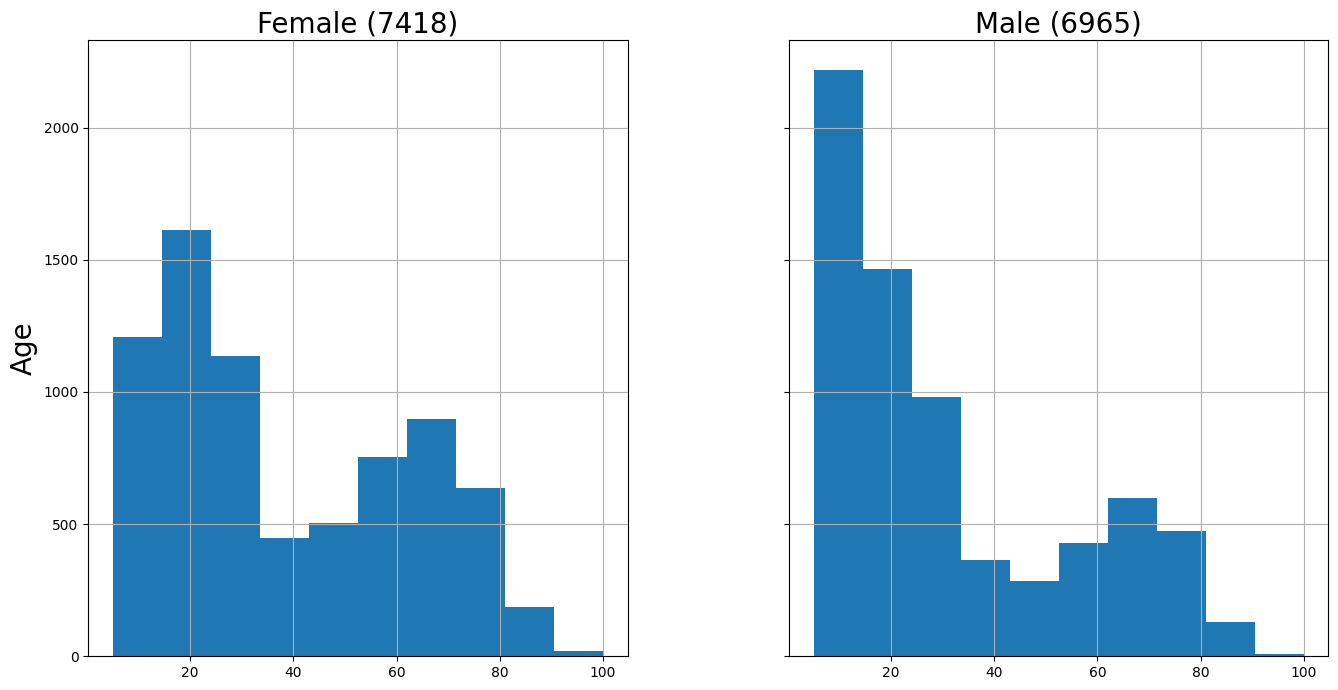

In [45]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)

total_female = len(df[df['Sex']=='FEMALE'])
total_male = len(df[df['Sex']=='MALE'])

df[df['Sex']=='FEMALE'].hist(ax=ax[0])
df[df['Sex']=='MALE'].hist(ax=ax[1])

ax[0].set_title('Female ('+str(total_female)+')', fontsize=20)
ax[1].set_title('Male ('+str(total_male)+')', fontsize=20)

ax[0].set_ylabel('Age', fontsize=20)

### Load data and build (feature, label)

In [171]:
path = '/Users/jayantadey/data_MRI/'
subjects = os.listdir(path)
X = []
y = []
IDs = set(df['ID'])
for subject in subjects:
    if subject in IDs:
        #print(df[df['ID']==subject]['Sex'])
        sex = int(df[df['ID']==subject]['Sex'].item()=='FEMALE')
        current_file = os.path.join(path, subject)
        tmp = []
        save = True
        for file in glob.glob(current_file+'/mri/*'):
            try:
                img = nb.load(file).get_fdata()
                print(img.shape)
                tmp.append(img.reshape(-1))
            except:
                save = False
                print(file,' corrupted')

        if len(tmp)<2:
            print(subject, ' has less files')
            
        if save and len(tmp)==2:
            X.append(np.array(tmp).reshape(1,-1))
            y.append(sex)

X = np.concatenate(X,axis=0)

sub-ABIDE1051480  has less files
sub-CC112141  has less files
sub-CC121397  has less files
sub-A00038957  has less files
sub-A00066781  has less files
sub-ABIDE1050109  has less files
sub-CC221373  has less files
sub-A00055765  has less files
sub-A00039075  has less files
sub-A00062917  has less files
sub-A00054482  has less files
sub-A00057035  has less files
sub-A00062928  has less files
sub-A00060471  has less files
sub-CC121194  has less files
sub-A00040629  has less files
sub-A00038959  has less files
sub-ABIDE1050107  has less files
sub-A00037582  has less files
sub-A00073296  has less files
sub-A00040286  has less files
sub-A00056919  has less files
sub-A00037112  has less files
sub-A00044084  has less files
sub-A00062926  has less files
sub-A00066788  has less files
sub-A00043299  has less files
sub-A00063458  has less files
sub-A00055906  has less files
(113, 137, 113)
(113, 137, 113)
sub-A00039276  has less files
sub-ABIDE1051489  has less files
sub-CC121158  has less files
(

In [172]:
X.shape

(94, 3498706)

In [170]:
total_sample = X.shape[0]
accuracy = 0.0

for ii in tqdm(range(total_sample)):
    X_ = np.concatenate((X[:ii],X[ii+1:]),axis=0)
    y_ = np.concatenate((y[:ii],y[ii+1:]))
    clf = RandomForestClassifier(n_estimators=1000)
    clf.fit(X_,y_)
    accuracy += int(clf.predict(X[ii].reshape(1,-1)==y[ii]))
accuracy /= total_sample

print('Accuracy is ',accuracy)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [22:40<00:00, 14.47s/it]

Accuracy is  0.22340425531914893


In [157]:
np.mean(y)

0.6276595744680851